In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d atasaygin/turkey-earthquakes-19152021

100% 476k/476k [00:00<00:00, 862kB/s]
100% 476k/476k [00:00<00:00, 862kB/s]


In [ ]:
!unzip turkey-earthquakes-19152021.zip -d turkey-earthquakes-19152021

Archive:  turkey-earthquakes-19152021.zip
  inflating: turkey-earthquakes-19152021/turkey_earthquakes(1915-2021).csv  


In [ ]:
#Necessary Python Libraries
import pandas as pd
#import hr-comma-sepcsv.csv file
eq_data = pd.read_csv('/content/turkey-earthquakes-19152021/turkey_earthquakes(1915-2021).csv', delimiter=";")
eq_data.head()

No   Deprem Kodu Olus tarihi  Olus zamani    Enlem   Boylam  Derinlik   xM  \
0   1  2.021010e+13  2021.01.01  16:36:21.41  35.9273  27.8658      26.1  3.9   
1   2  2.020120e+13  2020.12.31  00:51:27.94  37.8435  26.7775       8.0  3.8   
2   3  2.020120e+13  2020.12.30  18:45:12.79  36.4918  28.7092       5.0  3.9   
3   4  2.020120e+13  2020.12.30  13:40:12.22  37.7960  26.4165      14.4  4.4   
4   5  2.020120e+13  2020.12.27  20:08:36.88  38.4172  39.1482       5.0  3.9   

    MD   ML   Mw   Ms   Mb Tip                                             Yer  
0  0.0  3.9  3.7  0.0  0.0  Ke                           RODOS ADASI (AKDENIZ)  
1  0.0  3.8  3.7  0.0  0.0  Ke                                      EGE DENIZI  
2  0.0  3.7  3.9  0.0  0.0  Ke                                         AKDENIZ  
3  0.0  4.4  4.3  0.0  0.0  Ke                          ONIKI ADALAR (AKDENIZ)  
4  0.0  3.7  3.9  0.0  0.0  Ke  KAVAKKOY-SIVRICE (ELAZIG) [South West  0.5 km]

In [ ]:
eq_data.describe()

No   Deprem Kodu         Enlem        Boylam      Derinlik  \
count  17370.000000  1.737000e+04  17370.000000  17370.000000  17370.000000   
mean    8685.500000  1.995628e+13     38.087327     32.077299     15.551180   
std     5014.431423  1.972321e+11      1.639449      5.836045     21.437704   
min        1.000000  1.915020e+13     35.000000     26.000000      0.000000   
25%     4343.250000  1.984040e+13     36.810000     27.550000      5.000000   
50%     8685.500000  2.000010e+13     38.230000     29.380500      9.000000   
75%    13027.750000  2.011100e+13     39.230000     36.323075     15.000000   
max    17370.000000  2.021010e+13     41.998200     44.999200    199.000000   

                 xM            MD            ML           Mw            Ms  \
count  17370.000000  17370.000000  17370.000000  4645.000000  17370.000000   
mean       3.982637      1.939413      2.070961     4.178471      0.534249   
std        0.542448      2.014563      2.063218     1.056921      1.511660   
min        3.500000      0.000000      0.000000     0.000000      0.000000   
25%        3.600000      0.000000      0.000000     3.700000      0.000000   
50%        3.800000      0.000000      3.400000     4.200000      0.000000   
75%        4.200000      3.700000      3.900000     4.800000      0.000000   
max        7.900000      7.400000      7.200000     7.700000      7.900000   

                 Mb  
count  17370.000000  
mean       1.292084  
std        1.997397  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        3.700000  
max        7.100000

In [ ]:
eq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           17370 non-null  int64  
 1   Deprem Kodu  17370 non-null  float64
 2   Olus tarihi  17370 non-null  object 
 3   Olus zamani  17370 non-null  object 
 4   Enlem        17370 non-null  float64
 5   Boylam       17370 non-null  float64
 6   Derinlik     17370 non-null  float64
 7   xM           17370 non-null  float64
 8   MD           17370 non-null  float64
 9   ML           17370 non-null  float64
 10  Mw           4645 non-null   float64
 11  Ms           17370 non-null  float64
 12  Mb           17370 non-null  float64
 13  Tip          17370 non-null  object 
 14  Yer          17370 non-null  object 
dtypes: float64(10), int64(1), object(4)
memory usage: 2.0+ MB


In [ ]:
#Renaming columns to English words
eq_data_rn=eq_data
eq_data_rn=eq_data_rn.rename(columns={"Deprem Kodu":"earthquake_code","Olus tarihi":"Occurrence_Date",
                           "Olus zamani":"Occurrence_Time","Enlem":"Latitude","Boylam":"Longitude","Derinlik":"Depth","Tip":"Type","Yer":"Location"})

In [ ]:
eq_data_rn.head()
eq_data_rn.tail()

No  earthquake_code Occurrence_Date Occurrence_Time  Latitude  \
17365  17366     1.915090e+13      1915.09.23     07:20:01.00     40.00   
17366  17367     1.915050e+13      1915.05.19     04:48:02.40     37.62   
17367  17368     1.915040e+13      1915.04.01     05:41:05.00     40.50   
17368  17369     1.915020e+13      1915.02.28     12:47:02.40     37.70   
17369  17370     1.915020e+13      1915.02.14     08:20:00.60     38.80   

       Longitude  Depth   xM   MD   ML   Mw   Ms   Mb Type  \
17365      43.00   15.0  4.4  4.4  0.0  NaN  0.0  0.0   Ke   
17366      39.47   10.0  5.5  5.3  5.3  5.5  5.4  5.3   Ke   
17367      44.50   35.0  4.9  4.8  4.8  4.9  4.8  4.9   Ke   
17368      43.10   30.0  5.5  5.2  5.2  5.5  5.3  5.2   Ke   
17369      42.50   30.0  5.7  5.4  5.4  5.7  5.6  5.4   Ke   

                                              Location  
17365     EVYAPAN-KAGIZMAN (KARS) [South West  5.8 km]  
17366   CATLI-SIVEREK (SANLIURFA) [South East  3.5 km]  
17367                                       AZERBAYCAN  
17368  MEZRA-BEYTUSSEBAP (SIRNAK) [North West  9.0 km]  
17369   CEMALETTIN-AHLAT (BITLIS) [South West  3.7 km]

In [ ]:
#checking the incorrect data and time data
eq_data_rn['Occurrence_Date'][11109] + '  ' +eq_data_rn['Occurrence_Time'][11109]

'1991.12.06  10:03:73.00'

In [ ]:
# Splitting the dataframe due to before and after the '.'
eq_data_rn['Occurrence_Time'] = eq_data_rn['Occurrence_Time'].str.split('.').str[0]

# Saniye is greater than 60 for some data points. I located and dropped them
for i in range(0, len(eq_data_rn)):
    if float(eq_data_rn['Occurrence_Time'][i][6:]) >= 60:
        eq_data_rn = eq_data_rn.drop(i)
eq_data_rn = eq_data_rn.reset_index(drop=True)

In [ ]:
# Creating single column for date and time
Occurrence_Time = pd.to_datetime(eq_data_rn['Occurrence_Date'] + ' ' + eq_data_rn['Occurrence_Time'])
eq_data_rn['Occurrence_Time'] = Occurrence_Time
eq_data_rn.drop(['Occurrence_Date'], axis=1, inplace=True)
eq_data_rn.head()

No  earthquake_code     Occurrence_Time  Latitude  Longitude  Depth   xM  \
0   1     2.021010e+13 2021-01-01 16:36:21   35.9273    27.8658   26.1  3.9   
1   2     2.020120e+13 2020-12-31 00:51:27   37.8435    26.7775    8.0  3.8   
2   3     2.020120e+13 2020-12-30 18:45:12   36.4918    28.7092    5.0  3.9   
3   4     2.020120e+13 2020-12-30 13:40:12   37.7960    26.4165   14.4  4.4   
4   5     2.020120e+13 2020-12-27 20:08:36   38.4172    39.1482    5.0  3.9   

    MD   ML   Mw   Ms   Mb Type  \
0  0.0  3.9  3.7  0.0  0.0   Ke   
1  0.0  3.8  3.7  0.0  0.0   Ke   
2  0.0  3.7  3.9  0.0  0.0   Ke   
3  0.0  4.4  4.3  0.0  0.0   Ke   
4  0.0  3.7  3.9  0.0  0.0   Ke   

                                         Location  
0                           RODOS ADASI (AKDENIZ)  
1                                      EGE DENIZI  
2                                         AKDENIZ  
3                          ONIKI ADALAR (AKDENIZ)  
4  KAVAKKOY-SIVRICE (ELAZIG) [South West  0.5 km]

In [ ]:
#Dropping columns with single category/value
eq_data_rn = eq_data_rn.drop(['No', 'earthquake_code', 'Type'], axis=1)

In [ ]:
eq_data_rn.head()

Occurrence_Time  Latitude  Longitude  Depth   xM   MD   ML   Mw   Ms  \
0 2021-01-01 16:36:21   35.9273    27.8658   26.1  3.9  0.0  3.9  3.7  0.0   
1 2020-12-31 00:51:27   37.8435    26.7775    8.0  3.8  0.0  3.8  3.7  0.0   
2 2020-12-30 18:45:12   36.4918    28.7092    5.0  3.9  0.0  3.7  3.9  0.0   
3 2020-12-30 13:40:12   37.7960    26.4165   14.4  4.4  0.0  4.4  4.3  0.0   
4 2020-12-27 20:08:36   38.4172    39.1482    5.0  3.9  0.0  3.7  3.9  0.0   

    Mb                                        Location  
0  0.0                           RODOS ADASI (AKDENIZ)  
1  0.0                                      EGE DENIZI  
2  0.0                                         AKDENIZ  
3  0.0                          ONIKI ADALAR (AKDENIZ)  
4  0.0  KAVAKKOY-SIVRICE (ELAZIG) [South West  0.5 km]

In [ ]:
#Checking for incorrect values
eq_data_rn['Location'][4157]
eq_data_rn['Location'][17355]

'SAMSUN A?IKLARI (KARADENIZ)'

In [ ]:
# Creating a list with empty string values
Location = []
for y in range(len(eq_data_rn)):
    Location.append("")

# Placing location values to the empty list
for i in range(0, len(eq_data_rn)):
    Location[i] = eq_data_rn['Location'][i]

    # If the location values have '(', it will divided by left and right side of the '(', ')' in order
    if Location[i].find("(") != -1:
        Location[i] = Location[i].split('(')[1]
        Location[i] = Location[i].split(')')[0]
Location = pd.DataFrame(Location)
Location.head()

0
0     AKDENIZ
1  EGE DENIZI
2     AKDENIZ
3     AKDENIZ
4      ELAZIG

In [ ]:
#Data cleaning
# Getting rid of the string values start with '['
Location = Location[0].str.split('[').str[0].to_frame()
Location.columns = ['Location']

# Placing the created location column to the original dataset
eq_data_rn['Location'] = Location

In [ ]:
# Some data points have missing letters due to Turkish Alphabet unique letters
Location_update = {"?ORUM": "CORUM", "K?TAHYA": "KUTAHYA", "EGE DENiZi": "EGE DENIZI",
              "DiYARBAKIR": "DIYARBAKIR", "T?RKiYE-iRAN SINIR B?LGESi": "TURKIYE-IRAN SINIR BOLGESI",
              "BALIKESiR ": "BALIKESIR", "SiVAS": "SIVAS", "iZMiR": "IZMIR", "TUNCELi": "TUNCELI",
              "SURiYE": "SURIYE", "ESKiSEHiR": "ESKISEHIR", "DENiZLi": "DENIZLI", "BiTLiS": "BITLIS",
              "KiLiS": "KILIS", "VAN G?L?": "VAN GOLU", "?ANKIRI": "CANKIRI",
              "T?RKIYE-IRAN SINIR B?LGESI": "TURKIYE-IRAN SINIR BOLGESI", "MANiSA": "MANISA",
              "AKDENiZ": "AKDENIZ", "G?RCiSTAN": "GURCISTAN", "BiNGOL": "BINGOL", "OSMANiYE": "OSMANIYE",
              "KIRSEHiR": "KIRSEHIR", "MARMARA DENiZi": "MARMARA DENIZI", "ERZiNCAN": "ERZINCAN",
              "BALIKESiR": "BALIKESIR", "GAZiANTEP": "GAZIANTEP", "G?RCISTAN": "GURCISTAN",
              "?ANAKKALE'": "CANAKKALE", "HAKKARi": "HAKKARI", "AFYONKARAHiSAR": "AFYONKARAHISAR",
              "BiLECiK": "BILECIK", "KAYSERi": "KAYSERI", "T?RKiYE-IRAK SINIR B?LGESi": "TURKIYE-IRAK SINIR BOLGESI",
              "KARADENiZ": "KARADENIZ", "T?RKIYE-IRAK SINIR B?LGESI": "TURKIYE-IRAK SINIR BOLGESI",
              "KARAB?K": "KARABUK", "KIBRIS-SADRAZAMK?Y?K": "KIBRIS-SADRAZAMKOY",
              "T?RKIYE-SURIYE SINIR B?LGESI?K": "TURKIYE-SURIYE SINIR BOLGESI", "?ANAKKALE": "CANAKKALE",
              "KIBRIS-SADRAZAMK?Y": "KIBRIS-SADRAZAMKOY", "ERZURUM ": "ERZURUM",
              "T?RKIYE-SURIYE SINIR B?LGESI": "TURKIYE-SURIYE SINIR BOLGESI", "ADANA ": "ADANA", "KUS G?L?": "KUS GOLU",
              "BURDUR ": "BURDUR", "KIBRIS-G?ZELYURT": "KIBRIS-GUZELYURT", "KONYA ": "KONYA",
              "KOCAELI ": "KOCAELI", "AMASYA ": "AMASYA", "KIRSEHIR ": "KIRSEHIR",
              "KIBRIS-KILI?ASLAN": "KIBRIS-KILICASLAN", "KIBRIS-Z?MR?TK?Y": "KIBRIS-ZUMRUTKOY",
              "DENIZLI ": "DENIZLI", "MANISA ": "MANISA", "ULUBAT G?L?": "ULUBAT GOLU",
              "T?RKIYE-ERMENISTAN SINIR B?LGESI": "TURKIYE-ERMENISTAN SINIR BOLGESI",
              "ERZINCAN ": "ERZINCAN", "TOKAT ": "TOKAT", "ARDAHAN ": "ARDAHAN"}
eq_data_rn['Location'] = eq_data_rn['Location'].replace(Location_update)
eq_data_rn['Location'].head()

0       AKDENIZ
1    EGE DENIZI
2       AKDENIZ
3       AKDENIZ
4        ELAZIG
Name: Location, dtype: object

In [ ]:
eq_data_rn.isnull().any()

Occurrence_Time    False
Latitude           False
Longitude          False
Depth              False
xM                 False
MD                 False
ML                 False
Mw                  True
Ms                 False
Mb                 False
Location           False
dtype: bool

In [ ]:
eq_data_rn.isnull().sum()

Occurrence_Time        0
Latitude               0
Longitude              0
Depth                  0
xM                     0
MD                     0
ML                     0
Mw                 12724
Ms                     0
Mb                     0
Location               0
dtype: int64

In [ ]:
c=eq_data_rn.Location.unique()
len(c)

115

In [ ]:
#Data visualization
#Importing importanat libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import re

import numpy as np # linear algebra

In [21]:
#Data vizualization
#Time series analysis

aa = eq_data_rn['Occurrence_Time'].value_counts()
aa = aa.resample('Y').sum().to_frame()
fig = px.line(aa, x=aa.index, y='Occurrence_Time', text='Occurrence_Time',
              labels={
                  "index": "Year",
                  "Occurrence_Time": "Number of Earthquakes"
              }
              )
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Number of Earthquakes Annually',
                  title_x=0.5, title_font=dict(size=30))
fig.show()

In [ ]:
#Distribution of earthquakes anually
fig_hist = px.histogram(data_frame=eq_data_rn, x='Occurrence_Time')
fig_hist.update_layout(title_text='Distribution of the Earthquakes (Annually)',
                       title_x=0.5, title_font=dict(size=32))
fig_hist.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig_hist.show()

In [ ]:
#Distribution of the magnitudes
fig = px.histogram(eq_data_rn, x="xM", marginal='rug', hover_data=eq_data_rn.columns)
fig.update_layout(title_text='Distribution of the Magnitudes',
                  title_x=0.5, title_font=dict(size=32))
fig.show()

In [ ]:
#Distribution of the depth
fig = px.histogram(eq_data_rn, x="Depth", marginal='rug', hover_data=eq_data_rn.columns)
fig.update_layout(title_text='Distribution of the Depth(km)',
                  title_x=0.5, title_font=dict(size=32))
fig.show()

In [ ]:
#The Relationship between the Depth and the Magnitude
fig = px.scatter(eq_data_rn, x='xM', y='Depth')
fig.update_layout(title='The Relationship between the Depth and the Magnitude', title_x=0.5, title_font=dict(size=22))
fig.show()

In [ ]:
#number of earthquake based on location
Location_count = eq_data_rn.groupby(pd.Grouper(key='Location')).size().reset_index(name='count')
fig = px.treemap(Location_count, path=['Location'], values='count')
fig.update_layout(title_text='Number of Earthquakes due to Location',
                  title_x=0.5, title_font=dict(size=30)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [ ]:
#Top 10 frequent earthquake locations
Location_count = eq_data_rn.groupby(pd.Grouper(key='Location')).size().reset_index(name='count')
Location_count_top = Location_count.nlargest(10, 'count')[['Location', 'count']]
fig = px.bar(Location_count_top, x='Location', y='count', color='Location', text='count')
fig.update_layout(title_text='Top 10 Frequent Earthquake Locations',
                  title_x=0.5, title_font=dict(size=30))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [ ]:
#HeatMap of earthquake with Latitude &Longitude
fig = px.density_mapbox(eq_data_rn, lat=eq_data_rn['Latitude'], lon=eq_data_rn['Longitude'], z=eq_data_rn['xM'],
                        center=dict(lat=39.42, lon=35), zoom=4.5,
                        mapbox_style="stamen-terrain",
                        radius=10,
                        opacity=0.5)
fig.update_layout(title_text='Heatmap of the Earthquakes',
                  title_x=0.5, title_font=dict(size=32))
fig.show()

In [ ]:
#Top 30 earthquakes with highest magnitude
fig = px.scatter(eq_data_rn.nlargest(30, 'xM')[['xM', 'Location', 'Occurrence_Time']],
                 x='Occurrence_Time', y='xM', color='Location', text='xM', hover_name='Occurrence_Time',
                 size='xM')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 30 Earthquakes with high Magnitude vs Year',  # Main title for the project
                  title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title

fig.show()

Text(0.5, 1.0, 'Correlation Graph of the Dataset')

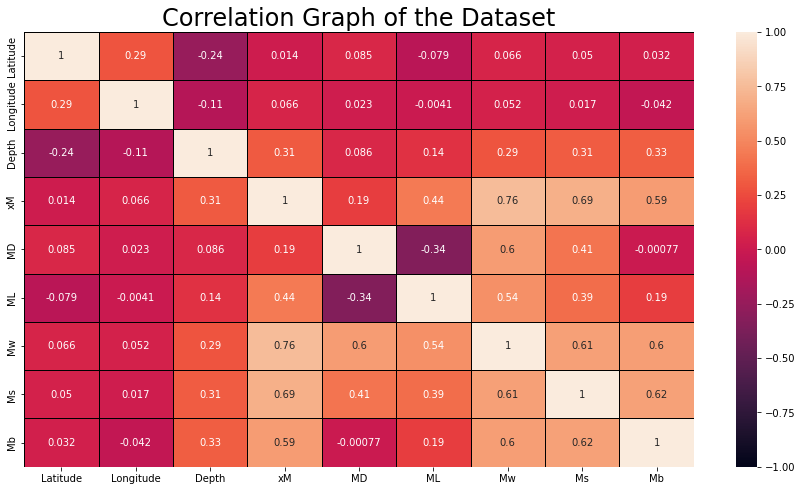

In [ ]:
#Correlation with target columns
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(eq_data_rn.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')
correlation.set_title('Correlation Graph of the Dataset', fontdict={'fontsize': 24})

In [ ]:
#relation between location and magnitude
fig = px.scatter(eq_data_rn, x='Location', y='xM')
fig.update_layout(title='The Relationship between the Location and the Magnitude', title_x=0.5, title_font=dict(size=22))
fig.show()

In [22]:
#seprating date/time elements
eq_data_rn["date_"] = pd.to_datetime(eq_data_rn["Occurrence_Time"])
eq_data_rn['year'] = eq_data_rn['date_'].dt.year
eq_data_rn['month'] = eq_data_rn['date_'].dt.month
eq_data_rn['day'] = eq_data_rn['date_'].dt.day
eq_data_rn['hour']=eq_data_rn['date_'].dt.hour
eq_data_rn['minute']=eq_data_rn['date_'].dt.minute
eq_data_ex1 = eq_data_rn.drop(['date_'], axis=1)
eq_data_ex1

Occurrence_Time  Latitude  Longitude  Depth   xM   MD   ML   Mw  \
0     2021-01-01 16:36:21   35.9273    27.8658   26.1  3.9  0.0  3.9  3.7   
1     2020-12-31 00:51:27   37.8435    26.7775    8.0  3.8  0.0  3.8  3.7   
2     2020-12-30 18:45:12   36.4918    28.7092    5.0  3.9  0.0  3.7  3.9   
3     2020-12-30 13:40:12   37.7960    26.4165   14.4  4.4  0.0  4.4  4.3   
4     2020-12-27 20:08:36   38.4172    39.1482    5.0  3.9  0.0  3.7  3.9   
...                   ...       ...        ...    ...  ...  ...  ...  ...   
17364 1915-09-23 07:20:01   40.0000    43.0000   15.0  4.4  4.4  0.0  NaN   
17365 1915-05-19 04:48:02   37.6200    39.4700   10.0  5.5  5.3  5.3  5.5   
17366 1915-04-01 05:41:05   40.5000    44.5000   35.0  4.9  4.8  4.8  4.9   
17367 1915-02-28 12:47:02   37.7000    43.1000   30.0  5.5  5.2  5.2  5.5   
17368 1915-02-14 08:20:00   38.8000    42.5000   30.0  5.7  5.4  5.4  5.7   

        Ms   Mb    Location  year  month  day  hour  minute  
0      0.0  0.0     AKDENIZ  2021      1    1    16      36  
1      0.0  0.0  EGE DENIZI  2020     12   31     0      51  
2      0.0  0.0     AKDENIZ  2020     12   30    18      45  
3      0.0  0.0     AKDENIZ  2020     12   30    13      40  
4      0.0  0.0      ELAZIG  2020     12   27    20       8  
...    ...  ...         ...   ...    ...  ...   ...     ...  
17364  0.0  0.0        KARS  1915      9   23     7      20  
17365  5.4  5.3   SANLIURFA  1915      5   19     4      48  
17366  4.8  4.9  AZERBAYCAN  1915      4    1     5      41  
17367  5.3  5.2      SIRNAK  1915      2   28    12      47  
17368  5.6  5.4      BITLIS  1915      2   14     8      20  

[17369 rows x 16 columns]

In [ ]:
#Checking proportion of earthquakes to month
tmp = eq_data_ex1[['year','month']]
tmp = tmp.groupby(by='year').agg(lambda x:x.value_counts().index[0])
tmp = tmp.reset_index()
#tmp= tmp.sort_values(by=['year','month'])
#have to add dummy at 0 as tmp df contain 1 to 12 for month
months = ['dummy','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = {k:months[k] for k in range(0,13)}
#print(months)
#print(tmp)
tmp['month'] = tmp['month'].replace(months)
#tmp
fig = px.pie(tmp, names='month',title='Propotion Of Earthquakes to Months')
fig.show()

In [247]:
#Removing unnecessary magnitude columns
eq_df_rn=eq_data_rn.drop([ 'MD', 'ML','Mw','Ms','Mb'], axis=1)

In [248]:
# Converting the Occurrence_Time column to datetime format
eq_df_rn['Occurrence_Time'] = pd.to_datetime(eq_df_rn['Occurrence_Time'], format='%Y-%m-%d %H:%M:%S')


In [249]:
eq_df_rn["timestamps"] = eq_df_rn["Occurrence_Time"]

In [250]:
eq_df_rn.set_index('Occurrence_Time',inplace=True)

eq_df_rn=eq_df_rn.sort_values(by=['timestamps'],ascending=True)
eq_df_rn.head()

Latitude  Longitude  Depth   xM    Location  \
Occurrence_Time                                                    
1915-02-14 08:20:00     38.80      42.50   30.0  5.7      BITLIS   
1915-02-28 12:47:02     37.70      43.10   30.0  5.5      SIRNAK   
1915-04-01 05:41:05     40.50      44.50   35.0  4.9  AZERBAYCAN   
1915-05-19 04:48:02     37.62      39.47   10.0  5.5   SANLIURFA   
1915-09-23 07:20:01     40.00      43.00   15.0  4.4        KARS   

                                  date_  year  month  day  hour  minute  \
Occurrence_Time                                                           
1915-02-14 08:20:00 1915-02-14 08:20:00  1915      2   14     8      20   
1915-02-28 12:47:02 1915-02-28 12:47:02  1915      2   28    12      47   
1915-04-01 05:41:05 1915-04-01 05:41:05  1915      4    1     5      41   
1915-05-19 04:48:02 1915-05-19 04:48:02  1915      5   19     4      48   
1915-09-23 07:20:01 1915-09-23 07:20:01  1915      9   23     7      20   

                             timestamps  
Occurrence_Time                          
1915-02-14 08:20:00 1915-02-14 08:20:00  
1915-02-28 12:47:02 1915-02-28 12:47:02  
1915-04-01 05:41:05 1915-04-01 05:41:05  
1915-05-19 04:48:02 1915-05-19 04:48:02  
1915-09-23 07:20:01 1915-09-23 07:20:01

In [251]:
# Number 1: Time intervals between consecutive earthquakes.
eq_df_rn["time_diff"] = eq_df_rn["timestamps"].diff()

eq_df_rn["time_diff_float"] = eq_df_rn["time_diff"].apply(lambda x: x.total_seconds())
eq_df_rn["magnitude"] = eq_df_rn["xM"].rolling(window=10).mean()
eq_df_rn.dropna(inplace = True)
eq_df_rn.head(10)

Latitude  Longitude  Depth   xM    Location  \
Occurrence_Time                                                    
1916-10-28 20:48:00      40.1       44.1   20.0  5.2       IGDIR   
1916-11-14 13:54:03      40.8       44.4   26.0  5.5  AZERBAYCAN   
1917-01-04 07:18:04      41.3       44.5   25.0  4.8  AZERBAYCAN   
1917-02-20 21:28:00      41.3       44.6   16.0  4.7  AZERBAYCAN   
1917-03-10 17:39:00      41.9       36.9   30.0  5.3   KARADENIZ   
1917-04-10 19:40:01      40.6       27.1   15.0  5.5    TEKIRDAG   
1917-06-04 01:13:03      37.0       26.0    5.0  4.7     AKDENIZ   
1917-06-13 12:15:45      36.0       28.0   15.0  4.8     AKDENIZ   
1917-08-08 03:41:10      39.0       27.0   15.0  4.7       IZMIR   
1917-12-27 07:42:00      40.5       26.0   10.0  5.3  EGE DENIZI   

                                  date_  year  month  day  hour  minute  \
Occurrence_Time                                                           
1916-10-28 20:48:00 1916-10-28 20:48:00  1916     10   28    20      48   
1916-11-14 13:54:03 1916-11-14 13:54:03  1916     11   14    13      54   
1917-01-04 07:18:04 1917-01-04 07:18:04  1917      1    4     7      18   
1917-02-20 21:28:00 1917-02-20 21:28:00  1917      2   20    21      28   
1917-03-10 17:39:00 1917-03-10 17:39:00  1917      3   10    17      39   
1917-04-10 19:40:01 1917-04-10 19:40:01  1917      4   10    19      40   
1917-06-04 01:13:03 1917-06-04 01:13:03  1917      6    4     1      13   
1917-06-13 12:15:45 1917-06-13 12:15:45  1917      6   13    12      15   
1917-08-08 03:41:10 1917-08-08 03:41:10  1917      8    8     3      41   
1917-12-27 07:42:00 1917-12-27 07:42:00  1917     12   27     7      42   

                             timestamps         time_diff  time_diff_float  \
Occurrence_Time                                                              
1916-10-28 20:48:00 1916-10-28 20:48:00  72 days 00:26:00        6222360.0   
1916-11-14 13:54:03 1916-11-14 13:54:03  16 days 17:06:03        1443963.0   
1917-01-04 07:18:04 1917-01-04 07:18:04  50 days 17:24:01        4382641.0   
1917-02-20 21:28:00 1917-02-20 21:28:00  47 days 14:09:56        4111796.0   
1917-03-10 17:39:00 1917-03-10 17:39:00  17 days 20:11:00        1541460.0   
1917-04-10 19:40:01 1917-04-10 19:40:01  31 days 02:01:01        2685661.0   
1917-06-04 01:13:03 1917-06-04 01:13:03  54 days 05:33:02        4685582.0   
1917-06-13 12:15:45 1917-06-13 12:15:45   9 days 11:02:42         817362.0   
1917-08-08 03:41:10 1917-08-08 03:41:10  55 days 15:25:25        4807525.0   
1917-12-27 07:42:00 1917-12-27 07:42:00 141 days 04:00:50       12196850.0   

                     magnitude  
Occurrence_Time                 
1916-10-28 20:48:00       5.29  
1916-11-14 13:54:03       5.27  
1917-01-04 07:18:04       5.20  
1917-02-20 21:28:00       5.18  
1917-03-10 17:39:00       5.16  
1917-04-10 19:40:01       5.27  
1917-06-04 01:13:03       5.20  
1917-06-13 12:15:45       4.97  
1917-08-08 03:41:10       5.01  
1917-12-27 07:42:00       5.05

In [252]:
#Dropping unwanted columns
eq_df_rn = eq_df_rn.drop(columns = ["date_","time_diff","month","day","hour","minute","year"])
eq_df_rn = eq_df_rn.drop(columns = ["timestamps"])
eq_df_rn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17360 entries, 1916-10-28 20:48:00 to 2021-01-01 16:36:21
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         17360 non-null  float64
 1   Longitude        17360 non-null  float64
 2   Depth            17360 non-null  float64
 3   xM               17360 non-null  float64
 4   Location         17360 non-null  object 
 5   time_diff_float  17360 non-null  float64
 6   magnitude        17360 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.1+ MB


In [405]:
#Selecting the data from high magnitude and high frequncy region
selected_rows = eq_df_rn[(eq_df_rn['Latitude'] >= 34) & (eq_df_rn['Latitude'] <= 41) & (eq_df_rn['Longitude'] >= 25) & (eq_df_rn['Longitude'] <= 32) & (eq_df_rn['xM']>=4)]

In [406]:
selected_rows

Latitude  Longitude  Depth   xM    Location  \
Occurrence_Time                                                    
1917-04-10 19:40:01   40.6000    27.1000   15.0  5.5    TEKIRDAG   
1917-06-04 01:13:03   37.0000    26.0000    5.0  4.7     AKDENIZ   
1917-06-13 12:15:45   36.0000    28.0000   15.0  4.8     AKDENIZ   
1917-08-08 03:41:10   39.0000    27.0000   15.0  4.7       IZMIR   
1917-12-27 07:42:00   40.5000    26.0000   10.0  5.3  EGE DENIZI   
...                       ...        ...    ...  ...         ...   
2020-12-11 14:37:49   39.9973    28.2088   10.2  4.1       BURSA   
2020-12-17 13:36:44   35.7032    26.2382    5.4  4.6     AKDENIZ   
2020-12-20 03:14:39   37.1260    28.5738   10.8  4.0       MUGLA   
2020-12-27 07:13:55   36.4750    28.7852    2.8  4.2     AKDENIZ   
2020-12-30 13:40:12   37.7960    26.4165   14.4  4.4     AKDENIZ   

                     time_diff_float  magnitude  
Occurrence_Time                                  
1917-04-10 19:40:01        2685661.0       5.27  
1917-06-04 01:13:03        4685582.0       5.20  
1917-06-13 12:15:45         817362.0       4.97  
1917-08-08 03:41:10        4807525.0       5.01  
1917-12-27 07:42:00       12196850.0       5.05  
...                              ...        ...  
2020-12-11 14:37:49          13000.0       3.75  
2020-12-17 13:36:44         154088.0       3.95  
2020-12-20 03:14:39         150629.0       3.94  
2020-12-27 07:13:55           2184.0       4.13  
2020-12-30 13:40:12         235896.0       4.19  

[4132 rows x 7 columns]

Text(0.5, 1.0, 'Correlation Graph of the Dataset')

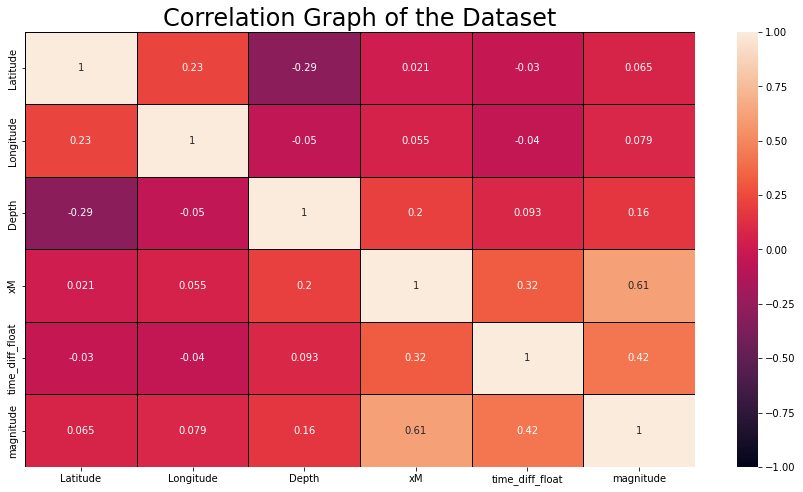

In [407]:
#Correlation with target columns
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(selected_rows.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')
correlation.set_title('Correlation Graph of the Dataset', fontdict={'fontsize': 24})

In [254]:
eq_df_rn1=eq_df_rn

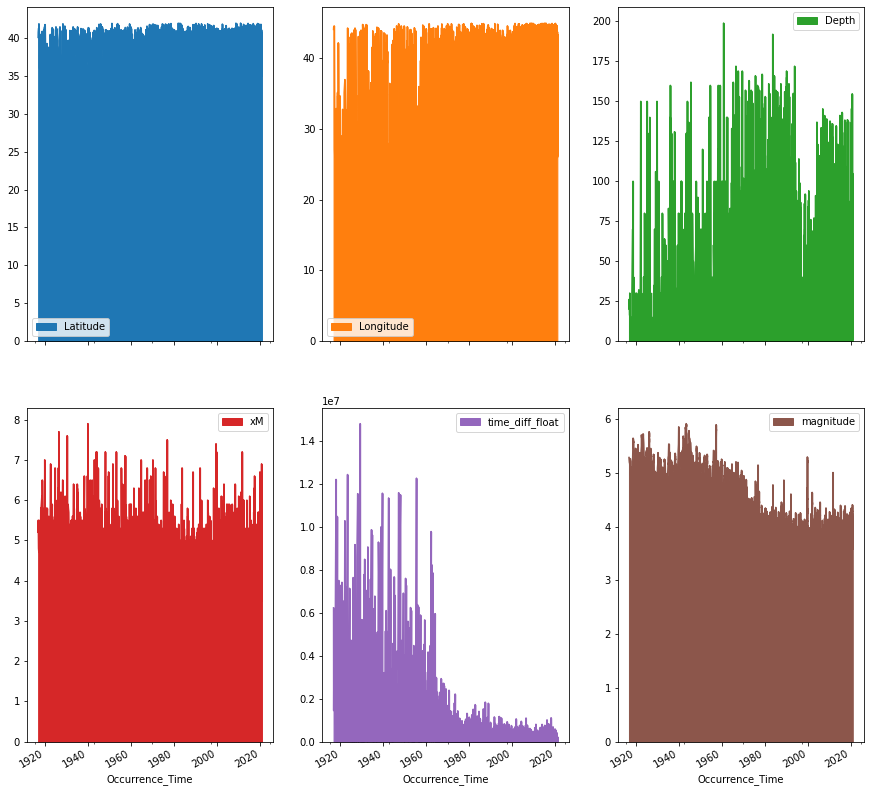

In [255]:
# Plot columns before Z-Score cleanup
eq_df_rn1.plot.area(subplots=True, layout=(2,3), figsize=(15,15));

In [257]:
# Obtain z-scores of data
from scipy import stats
z = np.abs(stats.zscore(eq_df_rn1[["xM", "time_diff_float", "magnitude", "Latitude", "Longitude"]]))

In [260]:
# Removing all data items outside of z-score 3
eq_df_rn1 = eq_df_rn1[(z<3).all(axis=1)]

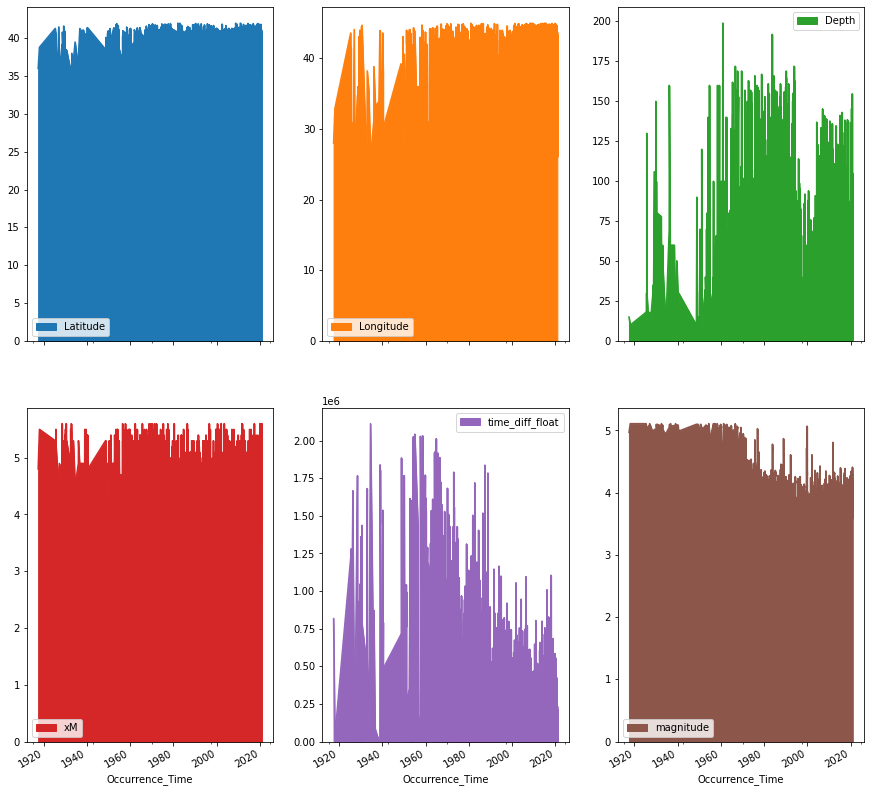

In [261]:
# Plot columns after Z-Score cleanup
eq_df_rn1.plot.area(subplots=True, layout=(2,3), figsize=(15,15));

In [408]:
#After cleanup, it does not seem much improvment in data, so assigning orignal dataframe to new df for model implementation
eq_data_ex3=selected_rows
eq_data_ex3.head()

Latitude  Longitude  Depth   xM    Location  \
Occurrence_Time                                                    
1917-04-10 19:40:01      40.6       27.1   15.0  5.5    TEKIRDAG   
1917-06-04 01:13:03      37.0       26.0    5.0  4.7     AKDENIZ   
1917-06-13 12:15:45      36.0       28.0   15.0  4.8     AKDENIZ   
1917-08-08 03:41:10      39.0       27.0   15.0  4.7       IZMIR   
1917-12-27 07:42:00      40.5       26.0   10.0  5.3  EGE DENIZI   

                     time_diff_float  magnitude  
Occurrence_Time                                  
1917-04-10 19:40:01        2685661.0       5.27  
1917-06-04 01:13:03        4685582.0       5.20  
1917-06-13 12:15:45         817362.0       4.97  
1917-08-08 03:41:10        4807525.0       5.01  
1917-12-27 07:42:00       12196850.0       5.05

Text(0.5, 1.0, 'Correlation Graph of the Dataset')

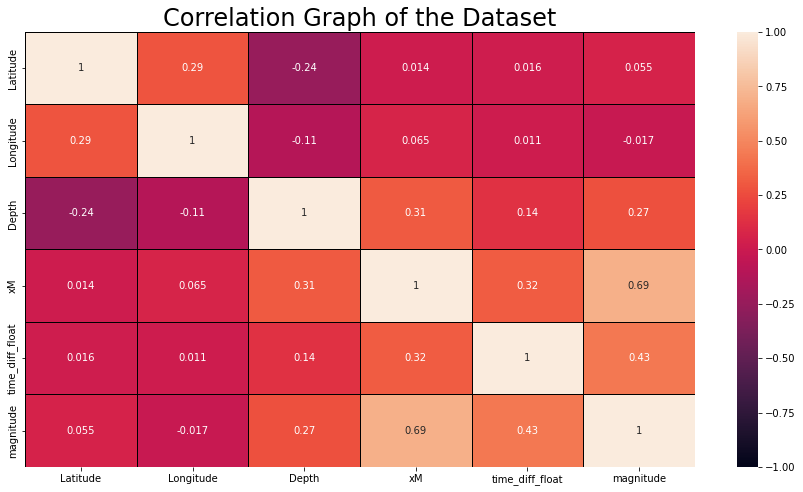

In [267]:
#Correlation with target columns
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(eq_data_ex3.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')
correlation.set_title('Correlation Graph of the Dataset', fontdict={'fontsize': 24})

In [409]:
#Splitting data
X = eq_data_ex3[['time_diff_float', 'Latitude', 'Longitude','magnitude']]
y = eq_data_ex3[['xM','Depth']]

In [269]:
print(len(X))
print(len(y))

17360
17360


In [410]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(3305, 4) (827, 4) (3305, 2) (827, 4)


In [411]:
#Feed-forward neural network
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(4,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [412]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [32]
epochs = [10]
#activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta','Adam']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

<ipython-input-412-f5430fe8c0da>:3: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [308]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.600000 using {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.400000 (0.489898) with: {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adam'}
0.600000 (0.489898) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.400792 (0.486760) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.584876 (0.478280) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adam

In [413]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [328]:
X_train.shape
y_train.shape

(13888, 1)

In [414]:
from tensorflow import keras
model = Sequential()
model.add(Dense(16, activation='sigmoid', input_shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
# Include an early stopping callback for convenience
early_stopping = keras.callbacks.EarlyStopping(
    # monitor (loss or val_loss)
    monitor='val_loss',
    # how many epochs to wait before stopping (minimum epochs)
    patience=100,
    # minimium amount of change to count as an improvement
    min_delta=0.001,
    restore_best_weights=True,
)

In [375]:
type(y_train)
y_train_array=y_train.to_numpy()

In [416]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# y_train is an array of class labels for your training data
classes = np.unique(y_train.values)
len(classes)
class_weight={0: 1, 1: 1, 2: 2, 3: 3, 4:4}
#class_weight={58:6}
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train.values.reshape(-1))

array([ 0.18342768,  0.45113295, 16.69191919,  4.1729798 ,  8.3459596 ,
        8.3459596 ,  8.3459596 ,  1.11279461, 16.69191919,  8.3459596 ,
        8.3459596 , 16.69191919,  8.3459596 , 16.69191919,  8.3459596 ,
        4.1729798 ,  0.92732884, 16.69191919, 16.69191919,  8.3459596 ,
       16.69191919, 16.69191919,  4.1729798 ,  0.02838762,  0.04215131,
        0.05167777,  0.0492387 ,  0.06785333,  0.07257356,  0.09325095,
        0.09171384,  0.10699948,  0.08604082,  0.04880678,  0.31494187,
        0.22865643,  0.15599924,  0.23845599,  0.32729253,  0.50581573,
        0.87852206,  0.83459596,  0.7587236 ,  0.25290787,  2.0864899 ,
        1.85465769,  2.38455988,  2.38455988,  1.85465769,  1.85465769,
        2.78198653,  1.5174472 ,  2.38455988,  0.29806999,  2.0864899 ,
        1.39099327,  2.78198653,  1.5174472 ,  2.38455988,  2.38455988,
        1.66919192,  1.5174472 ,  2.0864899 ,  0.23845599,  1.66919192,
        1.85465769,  1.85465769,  2.38455988,  2.38455988,  2.78

In [417]:
# Training with early stopping and class weights

import time

starttime = time.time()

history = model.fit(
    X_train, y_train,
    shuffle=True,
    validation_split=0.3,
    #validation_data=(X_valid, y_valid),
    batch_size=10,
    epochs=10,
    callbacks=[early_stopping],
    #class_weight="auto",
    class_weight = class_weight,
    verbose=1, # hide the output because we have so many epochs
)

print('Training Time: {:0.2f} seconds'.format(time.time() - starttime))

Epoch 1/10
232/232 [==============================] - 3s 7ms/step - loss: 0.0202 - accuracy: 0.0791 - val_loss: 0.0146 - val_accuracy: 0.0635
Epoch 2/10
232/232 [==============================] - 1s 5ms/step - loss: 0.0192 - accuracy: 0.0791 - val_loss: 0.0138 - val_accuracy: 0.0635
Epoch 3/10
232/232 [==============================] - 1s 5ms/step - loss: 0.0186 - accuracy: 0.0791 - val_loss: 0.0133 - val_accuracy: 0.0635
Epoch 4/10
232/232 [==============================] - 1s 4ms/step - loss: 0.0181 - accuracy: 0.0791 - val_loss: 0.0130 - val_accuracy: 0.0635
Epoch 5/10
232/232 [==============================] - 1s 4ms/step - loss: 0.0177 - accuracy: 0.0791 - val_loss: 0.0127 - val_accuracy: 0.0635
Epoch 6/10
232/232 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.0791 - val_loss: 0.0125 - val_accuracy: 0.0635
Epoch 7/10
232/232 [==============================] - 1s 4ms/step - loss: 0.0171 - accuracy: 0.0791 - val_loss: 0.0124 - val_accuracy: 0.0635
Epoch 

Best Validation Loss: 0.01
Best Validation Accuracy: 0.85


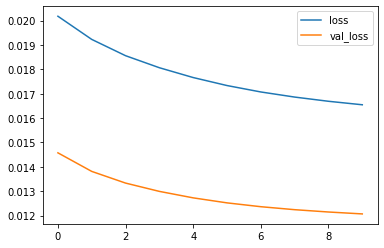

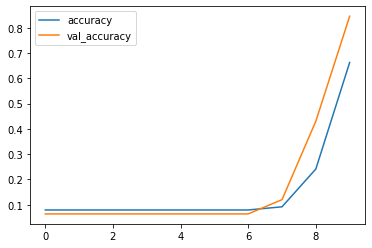

In [418]:
# Start the plot at epoch 5
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.2f}" +\
      "\nBest Validation Accuracy: {:0.2f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [419]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

26/26 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.8210
Evaluation result on Test Data : Loss = 0.009623936377465725, accuracy = 0.8210399150848389


In [420]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train_scale = scaler.fit_transform(y_train)
y_test_scale = scaler.transform(y_test)

In [421]:
from sklearn import metrics
y_pred1 = model.predict(X_test)
cf_matrix1= metrics.confusion_matrix(y_test_scale.argmax(axis=1), y_pred1.argmax(axis=1))
cf_matrix1

26/26 [==============================] - 0s 3ms/step


array([[ 52, 367],
       [ 49, 359]])

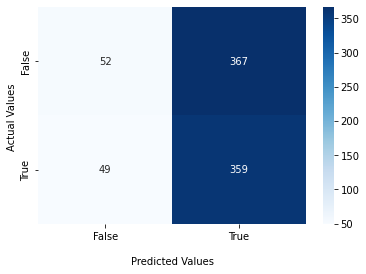

In [422]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
#plt.rcParams["figure.figsize"] = (8,5)

ax = sns.heatmap(cf_matrix1, annot=True, cmap='Blues', fmt='g')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [426]:
#Checking precision,F1-score and recall
print('Precision: %.3f' % precision_score(y_test_scale.argmax(axis=1), y_pred1.argmax(axis=1)))
print('f1-score: %.3f' % f1_score(y_test_scale.argmax(axis=1), y_pred1.argmax(axis=1)))
print('recall: %.3f' % metrics.recall_score(y_test_scale.argmax(axis=1), y_pred1.argmax(axis=1)))

Precision: 0.494
f1-score: 0.633
recall: 0.880


In [467]:
#Splitting data
X = eq_data_ex3[['time_diff_float', 'Latitude', 'Longitude']]
y = eq_data_ex3[['xM','Depth']]

In [468]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(3305, 3) (827, 3) (3305, 2) (827, 3)


In [469]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [470]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape

(3305, 3, 1)

In [486]:
len(classes)
class_weight={0: 1, 1: 1, 2: 2, 3: 3, 4:1, 5:2,6:3,7:4}

In [487]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow import keras
from keras.layers import Input, Dense
model1 = Sequential()

model1.add(LSTM(units=64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(0.1)) 
model1.add(LSTM(units=50))
model1.add(Dense(2))
early_stopping = keras.callbacks.EarlyStopping(
    # monitor (loss or val_loss)
    monitor='val_loss',
    # how many epochs to wait before stopping (minimum epochs)
    patience=100,
    # minimium amount of change to count as an improvement
    min_delta=0.001,
    restore_best_weights=True,
)
model1.compile(loss='squared_hinge', optimizer='SGD', metrics=['accuracy'])

model1.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 3, 64)             16896     
                                                                 
 dropout_30 (Dropout)        (None, 3, 64)             0         
                                                                 
 lstm_61 (LSTM)              (None, 50)                23000     
                                                                 
 dense_91 (Dense)            (None, 2)                 102       
                                                                 
Total params: 39,998
Trainable params: 39,998
Non-trainable params: 0
_________________________________________________________________


In [488]:
# Training with early stopping and class weights

import time

starttime = time.time()

history1 = model1.fit(
    X_train, y_train,
    shuffle=False,
    validation_split=0.3,
    #validation_data=(X_valid, y_valid),
    batch_size=10,
    epochs=10,
    callbacks=[early_stopping],
    class_weight = class_weight,
    verbose=1
)

print('Training Time: {:0.2f} seconds'.format(time.time() - starttime))

Epoch 1/10
232/232 [==============================] - 10s 20ms/step - loss: 0.0251 - accuracy: 0.9192 - val_loss: 0.0122 - val_accuracy: 0.9365
Epoch 2/10
232/232 [==============================] - 2s 10ms/step - loss: 0.0166 - accuracy: 0.9209 - val_loss: 0.0121 - val_accuracy: 0.9365
Epoch 3/10
232/232 [==============================] - 2s 9ms/step - loss: 0.0163 - accuracy: 0.9209 - val_loss: 0.0119 - val_accuracy: 0.9365
Epoch 4/10
232/232 [==============================] - 2s 9ms/step - loss: 0.0162 - accuracy: 0.9209 - val_loss: 0.0119 - val_accuracy: 0.9365
Epoch 5/10
232/232 [==============================] - 2s 9ms/step - loss: 0.0160 - accuracy: 0.9209 - val_loss: 0.0118 - val_accuracy: 0.9365
Epoch 6/10
232/232 [==============================] - 2s 9ms/step - loss: 0.0159 - accuracy: 0.9209 - val_loss: 0.0117 - val_accuracy: 0.9365
Epoch 7/10
232/232 [==============================] - 3s 14ms/step - loss: 0.0158 - accuracy: 0.9209 - val_loss: 0.0116 - val_accuracy: 0.9365
Ep

Best Validation Loss: 0.01
Best Validation Accuracy: 0.94


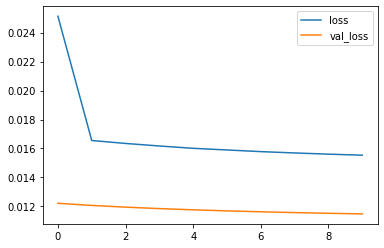

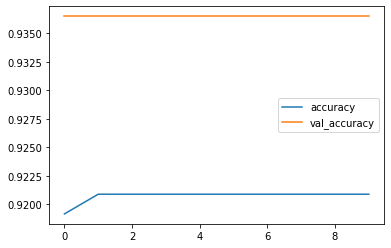

In [489]:
# Start the plot at epoch 5
history_df1 = pd.DataFrame(history1.history)
history_df1.loc[:, ['loss', 'val_loss']].plot()
history_df1.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.2f}" +\
      "\nBest Validation Accuracy: {:0.2f}")\
      .format(history_df1['val_loss'].min(), 
              history_df1['val_accuracy'].max()))

In [490]:
[test_loss, test_acc] = model1.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

26/26 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 0.9262
Evaluation result on Test Data : Loss = 0.008888018317520618, accuracy = 0.9262394309043884


In [491]:
y_test_orig = y_test.to_numpy()

In [492]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train_scale = scaler.fit_transform(y_train)
y_test_scale = scaler.transform(y_test)

In [493]:
from sklearn import metrics
y_pred2 = model1.predict(X_test)
cf_matrix2= metrics.confusion_matrix(y_test_scale.argmax(axis=1), y_pred2.argmax(axis=1))
cf_matrix2

26/26 [==============================] - 1s 4ms/step


array([[  0, 419],
       [  0, 408]])

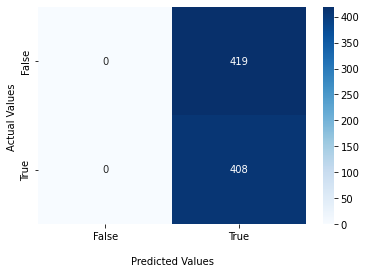

In [494]:
import seaborn as sns
from matplotlib import pyplot as plt

#plt.rcParams["figure.figsize"] = (8,5)

ax = sns.heatmap(cf_matrix2, annot=True, cmap='Blues', fmt='g')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [495]:
print('Precision: %.3f' % precision_score(y_test_scale.argmax(axis=1), y_pred2.argmax(axis=1)))
print('f1-score: %.3f' % f1_score(y_test_scale.argmax(axis=1), y_pred2.argmax(axis=1)))
print('recall: %.3f' % metrics.recall_score(y_test_scale.argmax(axis=1), y_pred2.argmax(axis=1)))

Precision: 0.493
f1-score: 0.661
recall: 1.000


In [501]:
#Splitting data
X = eq_data_ex3[['time_diff_float', 'Latitude', 'Longitude']]
y = eq_data_ex3[['xM','Depth']]

In [502]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(3305, 3) (827, 3) (3305, 2) (827, 3)


In [503]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [499]:
from keras import optimizers
epochs = 40
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

In [505]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train.shape)
print('Validation set shape', X_test.shape)

Train set shape (3305, 3, 1)
Validation set shape (827, 3, 1)


In [515]:
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(2,activation='relu'))
model_cnn.compile(loss='squared_hinge', optimizer='SGD',metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2, 128)            384       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_96 (Dense)            (None, 128)               16512     
                                                                 
 dense_97 (Dense)            (None, 2)                 258       
                                                                 
Total params: 17,154
Trainable params: 17,154
Non-trainable params: 0
_________________________________________________

In [513]:
# Creating class weight dictionary
class_weight = {0: 100, 1: 1, 2: 2}

In [516]:
cnn_history = model_cnn.fit(X_train, y_train, validation_split=0.1, epochs=10,batch_size=32, verbose=1,callbacks=[early_stopping],class_weight=class_weight
                            )

Epoch 1/10
93/93 [==============================] - 2s 9ms/step - loss: 1.7130 - accuracy: 0.7424 - val_loss: 0.0106 - val_accuracy: 0.9305
Epoch 2/10
93/93 [==============================] - 0s 5ms/step - loss: 1.4134 - accuracy: 0.9072 - val_loss: 0.0106 - val_accuracy: 0.9305
Epoch 3/10
93/93 [==============================] - 1s 6ms/step - loss: 1.4128 - accuracy: 0.9095 - val_loss: 0.0106 - val_accuracy: 0.9305
Epoch 4/10
93/93 [==============================] - 0s 5ms/step - loss: 1.4125 - accuracy: 0.9116 - val_loss: 0.0106 - val_accuracy: 0.9335
Epoch 5/10
93/93 [==============================] - 0s 5ms/step - loss: 1.4124 - accuracy: 0.9126 - val_loss: 0.0106 - val_accuracy: 0.9335
Epoch 6/10
93/93 [==============================] - 0s 3ms/step - loss: 1.4123 - accuracy: 0.9126 - val_loss: 0.0106 - val_accuracy: 0.9366
Epoch 7/10
93/93 [==============================] - 0s 4ms/step - loss: 1.4123 - accuracy: 0.9126 - val_loss: 0.0106 - val_accuracy: 0.9366
Epoch 8/10
93/93 [==

Best Validation Loss: 0.01
Best Validation Accuracy: 0.94


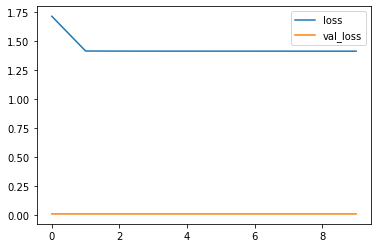

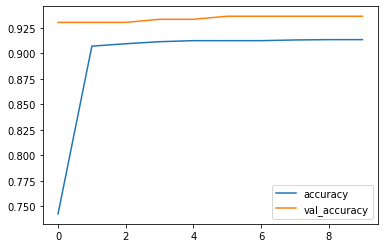

In [517]:
# Start the plot at epoch 5
cnn_history = pd.DataFrame(cnn_history.history)
cnn_history.loc[:, ['loss', 'val_loss']].plot()
cnn_history.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.2f}" +\
      "\nBest Validation Accuracy: {:0.2f}")\
      .format(cnn_history['val_loss'].min(), 
              cnn_history['val_accuracy'].max()))

In [518]:
[test_loss, test_acc] = model_cnn.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

26/26 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9154
Evaluation result on Test Data : Loss = 0.00846504233777523, accuracy = 0.9153566956520081


In [519]:
from sklearn import metrics
y_pred = model_cnn.predict(X_test)
cf_matrix= metrics.confusion_matrix(y_test_scale.argmax(axis=1), y_pred.argmax(axis=1))
cf_matrix

26/26 [==============================] - 0s 3ms/step


array([[  8, 411],
       [  1, 407]])

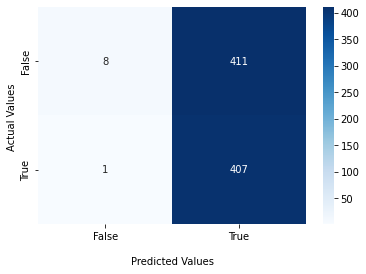

In [520]:
import seaborn as sns
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = (8,5)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [521]:
print('Precision: %.3f' % precision_score(y_test_scale.argmax(axis=1), y_pred.argmax(axis=1)))
print('f1-score: %.3f' % f1_score(y_test_scale.argmax(axis=1), y_pred.argmax(axis=1)))
print('recall: %.3f' % metrics.recall_score(y_test_scale.argmax(axis=1), y_pred.argmax(axis=1)))

Precision: 0.498
f1-score: 0.664
recall: 0.998
